In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import collections


digits = load_digits()
X, y = digits.data, digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")





Training data shape: (1437, 64)
Testing data shape: (360, 64)


In [7]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    
    for test_point in X_test:
        
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        
        k_indices = np.argsort(distances)[:k]
        
    
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        
        majority_vote = collections.Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(majority_vote)
        
    return np.array(predictions)


Accuracy for k=1: 0.98
Accuracy for k=3: 0.98
Accuracy for k=5: 0.99
Accuracy for k=7: 0.99
Accuracy for k=9: 0.98


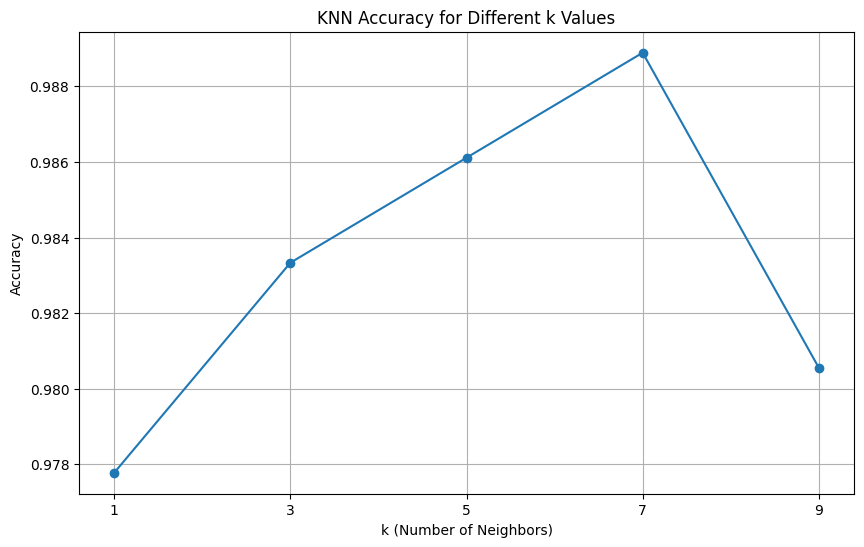

In [8]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
